In [2]:
#Import the libraries and packages we need
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# the famous import font code to use Andale Mono
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

In [4]:
df = pd.read_csv('premier-league-tables.csv')

In [5]:
df

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,→ European Cup Winners' Cup via cup win 2
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56,NaN
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
621,2023,Nott'ham Forest,16,38,9,11,18,38,68,-30,38,NaN
622,2023,Southampton,20,38,6,7,25,36,73,-37,25,Relegated
623,2023,Tottenham,8,38,18,6,14,70,63,7,60,NaN
624,2023,West Ham,14,38,11,7,20,42,55,-13,40,NaN


In [6]:
df['GD'] = df['GF'] - df['GA']

In [7]:
df

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
0,1993,Arsenal,10,42,15,11,16,40,38,2,56,→ European Cup Winners' Cup via cup win 2
1,1993,Aston Villa,2,42,21,11,10,57,40,17,74,→ UEFA Cup via league finish
2,1993,Blackburn,4,42,20,11,11,68,46,22,71,NaN
3,1993,Chelsea,11,42,14,14,14,51,54,-3,56,NaN
4,1993,Coventry City,15,42,13,13,16,52,57,-5,52,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
621,2023,Nott'ham Forest,16,38,9,11,18,38,68,-30,38,NaN
622,2023,Southampton,20,38,6,7,25,36,73,-37,25,Relegated
623,2023,Tottenham,8,38,18,6,14,70,63,7,60,NaN
624,2023,West Ham,14,38,11,7,20,42,55,-13,40,NaN


In [8]:
y=df.Rk
x=df.GD.values.reshape(-1,1)

In [9]:
x.shape

(626, 1)

In [10]:
y.shape

(626,)

In [11]:
model = LinearRegression().fit(x,y)

In [12]:
r_sq = model.score(x,y)
intercept = model.intercept_
slope = model.coef_

In [13]:
y_pred = intercept + slope*x

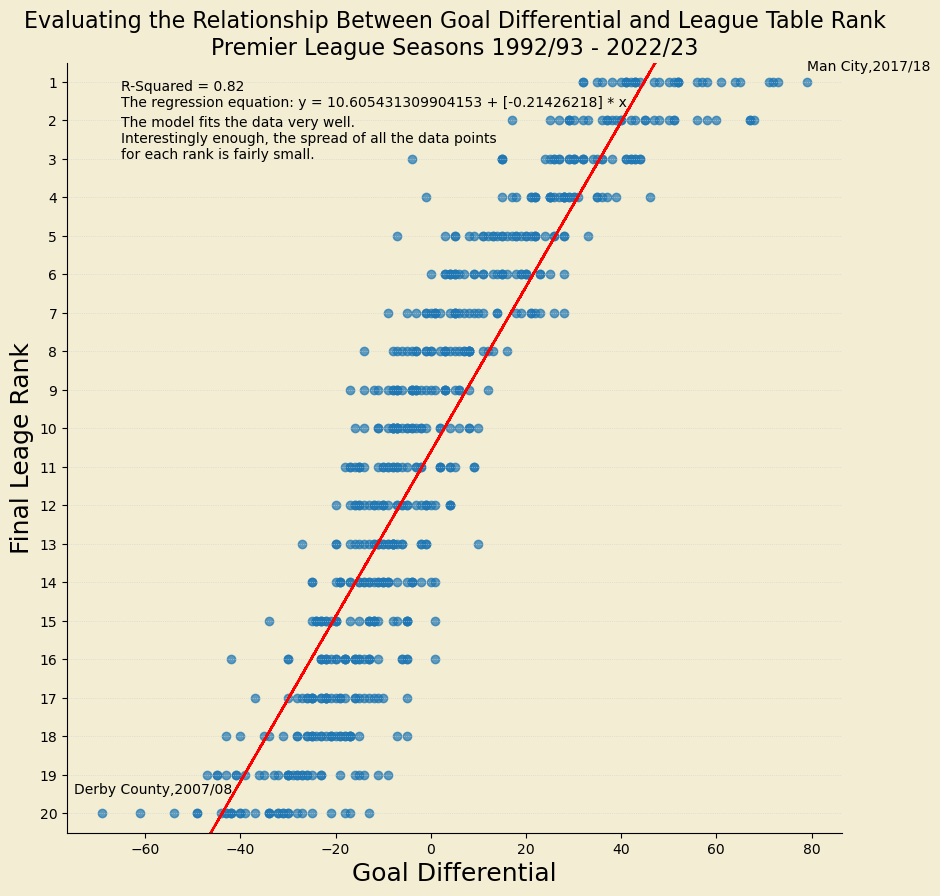

In [20]:
fig,ax = plt.subplots(figsize=(10,10))
fig.set_facecolor('#f3edd3')
ax.patch.set_facecolor('#f3edd3')

ax.grid(ls='dotted',lw=.5,color='lightgrey',axis='y',zorder=1)
spines = ['top','right']
for i in spines:
    if i in spines:
        ax.spines[i].set_visible(False)

#plot data
plt.scatter(x,y,alpha=.7)
plt.plot(x,y_pred,c='red',linestyle='--',dashes=(5,5))


plt.ylim(.5,20.5)
plt.gca().invert_yaxis()

plt.yticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.xlabel('Goal Differential',fontsize=18)
plt.ylabel('Final Leage Rank',fontsize=18)
plt.title('Evaluating the Relationship Between Goal Differential and League Table Rank\nPremier League Seasons 1992/93 - 2022/23',ha='center',fontsize=16)

#annotate teams
ax.annotate(xy=(79,.7),text='Man City,2017/18')
ax.annotate(xy=(-75,19.5),text='Derby County,2007/08')


#analysis
ax.annotate(xy=(-65,1.65),text=f'R-Squared = {round(r_sq,2)}\nThe regression equation: y = {intercept} + {slope} * x ')
#ax.annotate(xy=(10,9),text='No team that finished 9th underperformed the model',fontname='Andale Mono')
#ax.annotate(xy=(-5,17),text='No team that finished 17th overperformed the model',fontname='Andale Mono')
ax.annotate(xy=(-65,3),text=f'The model fits the data very well.\nInterestingly enough, the spread of all the data points\nfor each rank is fairly small.')

plt.savefig('premline.png',dpi=300,bbox_inches = 'tight',facecolor='#f3edd3')

In [18]:
df.sort_values(by='Rk',ascending=True).head(30)

,Season_End_Year,Team,Rk,MP,W,D,L,GF,GA,GD,Pts,Notes
413,2013,Manchester Utd,1,38,28,5,5,86,43,43,89,→ Champions League via league finish
252,2005,Chelsea,1,38,29,8,1,72,15,57,95,→ Champions League via league finish
46,1995,Blackburn,1,42,27,8,7,80,39,41,89,→ Champions League via league finish
435,2014,Manchester City,1,38,27,5,6,102,37,65,86,→ Champions League via league finish
76,1996,Manchester Utd,1,38,25,7,6,73,35,38,82,→ Champions League via league finish
472,2016,Leicester City,1,38,23,12,3,68,36,32,81,→ Champions League via league finish
516,2018,Manchester City,1,38,32,4,2,106,27,79,100,→ Champions League via league finish
32,1994,Manchester Utd,1,42,27,11,4,80,38,42,92,→ Champions League via league finish
577,2021,Manchester City,1,38,27,5,6,83,32,51,86,→ Champions League via league finish
179,2001,Manchester Utd,1,38,24,8,6,79,31,48,80,→ Champions League via league finish
